#  Pymaceuticals Inc.

### Observations
_______

- Although Testing began with the same amount of mice with a close to equal split by gender, tumor volume seemed higher amongst female subjects
- The Drug Ramicane shows the greatest reduction of tumor volume based on mean and final tumor volume.
- The higher the weight of the mouse was, the less effect the drug had on mice as per the scatter plot below showing tumor increases with heavier mice.
- In conclusion, after 45 days of treatment, the survival rate remained at an increase with the Capomulin. The opposite occured with Infubinol where data shows a survival rate decrease.This in turn showed Capomulin being the most efficient drug for treatment

In [6]:

#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combined_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
count_mice = combined_df["Mouse ID"].nunique()
count_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data =combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_data

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data =combined_df.loc[combined_df["Mouse ID"] =="g989"]
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df =combined_df[combined_df['Mouse ID'].isin(duplicate_data)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
 # Checking the number of mice in the clean DataFrame.
count_mice = clean_df['Mouse ID'].nunique()
count_mice

248

###  Summary Statistics
_________

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
 

drug_regimen_group = clean_df.groupby("Drug Regimen")

print(drug_regimen_group["Mouse ID"].count())
mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
median = drug_regimen_group['Tumor Volume (mm3)'].median()
variance = drug_regimen_group['Tumor Volume (mm3)'].var()
standard_dv =drug_regimen_group['Tumor Volume (mm3)'].std()
sem =drug_regimen_group['Tumor Volume (mm3)'].sem()

regimen_summary_df = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":standard_dv,"SEM":sem})
regimen_summary_df


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar and Pie Charts
___

TypeError: 'AxesSubplot' object is not callable

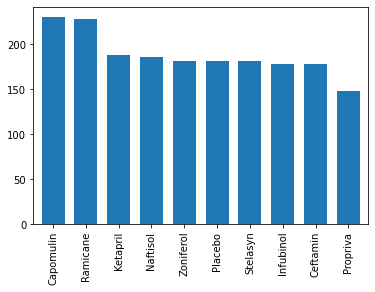

In [157]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot = bar_plot(kind='bar', color='blue', alpha=0.7, label='Number of Mice', legend=True)

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Data Points")
bar_plot.set_title("Timepoints for Each Treatment Regimen")

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
bar_plot.grid(zorder=0)

#Save the figure
plt.tight_layout()
plt.savefig("../images/Timepoints.png")


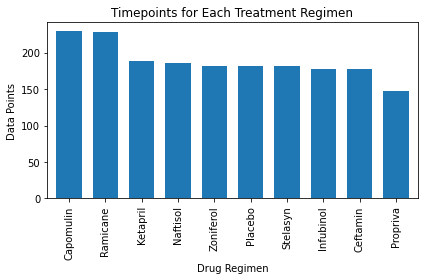

In [153]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Data Points")
bar_plot.set_title("Timepoints for Each Treatment Regimen")


#Save the figure
plt.tight_layout()
plt.savefig("../images/Timepoints.png")

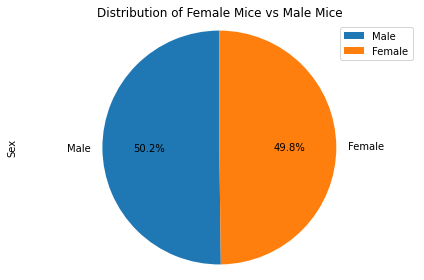

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Drop duplicates of mice id to get unique data
gender_mice = combined_df.drop_duplicates("Mouse ID")

# Get number counts for male and female mice
gender_mice = gender_mice["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice.plot(kind="pie", autopct = "%1.1f%%", startangle = 90, title = "Distribution of Female Mice vs Male Mice")

# Set the pie figure to equal
plt.axis("equal")

# Set the legend
plt.legend(loc = "upper right")

#Save the figure
plt.tight_layout()
plt.savefig("../images/pieplot.png")

# Show the plot
plt.show()



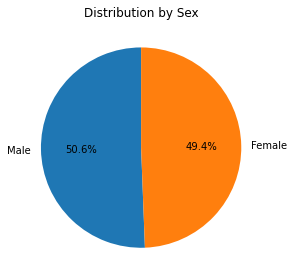

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
data = combined_df['Sex'].value_counts()

# Create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')


#Save the figure
plt.tight_layout()
plt.savefig("../images/pyplot.png")

# Display resulting plot
plt.show()


In [151]:
#  Group by gender and get the number to plot

gender_mice = gender_size.groupby(["Mouse ID","Sex"])
gender_mice

gender_size = pd.DataFrame(groupby_gender.size)

# Create the dataframe with total count of Female and Male mice
gender_size = pd.DataFrame(gender_size.groupby(["Sex"]).count())
gender_mice.columns = ["Total Count"]

# create and format the percentage of female vs male
gender_mice["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format 
gender_mice["Percentage of Sex"] = mouse_gender["Percentage of Sex"]


gender_mice




NameError: name 'gender_size' is not defined

###  Quartiles, Outliers and Boxplots
____

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

maxtime=clean_df.loc[:, ['Mouse ID','Timepoint']].groupby('Mouse ID').max()
maxtime

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
formatted_df=pd.merge(maxtime, clean_df, on=['Mouse ID','Timepoint'], how='left')
formatted_df.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
maxtime=clean_df.loc[:, ['Mouse ID','Timepoint']].groupby('Mouse ID').max()
maxtime

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df=pd.merge(maxtime, clean_df, on=['Mouse ID','Timepoint'], how='left')
final_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [77]:

# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for drug in list_of_drugs:
    volume_df = clean_df.loc[clean_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]


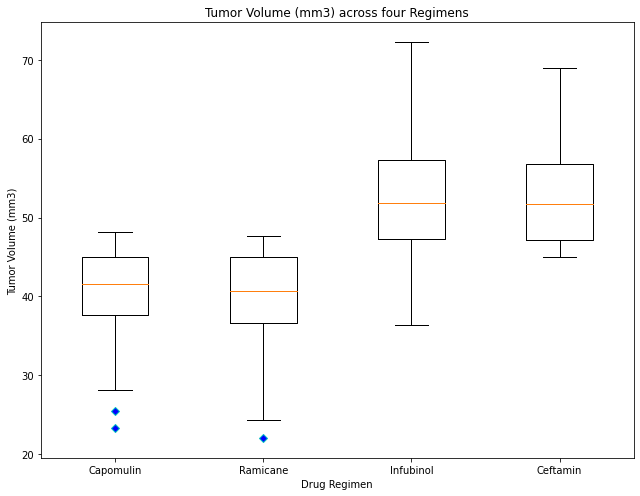

In [143]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

blue_dot = dict(markerfacecolor="b",marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.boxplot(tumor_vol, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drugs) + 1),ticklabels=list_of_drugs)

#Save the figure
plt.tight_layout()
plt.savefig("../images/BoxplotTumor.png")


plt.show()


###  Line and Scatter Plots
___

In [111]:
# Create a dataframe for only the Capomulin data
capomulin_data = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [120]:
# Identify data points of a mouse treated with Capomulin
mouse = combined_df.loc[combined_df['Mouse ID'] == 's185']


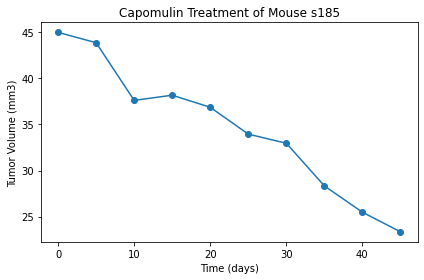

In [144]:
# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

#Save the figure
plt.tight_layout()
plt.savefig("../images/LineChart.png")



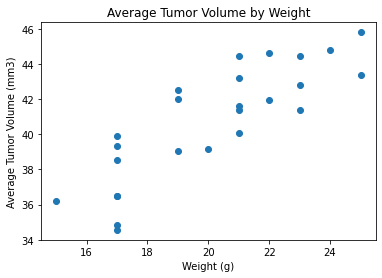

In [126]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()



The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


###  Correlation and Regression
___

In [128]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")



The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


In [137]:

# Calculate linear regression

x = cap_mouse_id['Mouse_weight']
y = cap_mouse_id['Tumor_vol_']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=13,color="green")

# Add labels and title to plot
plt.xlab(slope, intercept, rvalue, pvalue, stderr)("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


NameError: name 'linregress' is not defined